# <a id='top'></a>
# <div class="list-group" id="list-tab" role="tablist">
# <p style="background-color:#010521 ;font-family:newtimeroman;color:white;font-size:150%;text-align:center;border-radius:55px 1px;">Implementations & Data Load:</p>   
<font color='Red'>
You Must Run The Following Code in case to Run any Model From The Models Below

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("Battery_RUL.csv")
data.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


# <a id='top'></a>
# <div class="list-group" id="list-tab" role="tablist">
# <p style="background-color:#010521 ;font-family:newtimeroman;color:white;font-size:100%;text-align:center;border-radius:55px 1px;">AGENDA</p>  

You Can Choose the model you want to run from these Different Models (Regression And Classification):


<font color='Red'>
Content:

1. [KNN-Regression](#knn-regression)
2. [KNN-Classification](#knn-classification)
3. [Linear Regression](#linear-regression)
4. [Logistic Regression](#logistic-regression)
5. [Decision Tree Regression](#decision-tree-regression)
6. [Decision Tree Classification](#decision-tree-classification)
7. [Support Vector Regression](#support-vector-regression)
8. [Support Vector Classification](#support-vector-classification)
9. [Random Forest Regression](#random-forest-regression)
10. [Random Forest Classification](#random-forest-classification)

# KNN Regression :
K-Nearest Neighbors (KNN) Regression is a non-parametric and lazy supervised learning algorithm used for both classification and regression tasks. In KNN regression, the algorithm predicts the target variable by averaging the values of its k-nearest neighbors

NAN values have been dropped successfully 

NaN values in y_train: 0
NaN values in y_test: 0
NaN values in X_train: 0
NaN values in X_test: 0


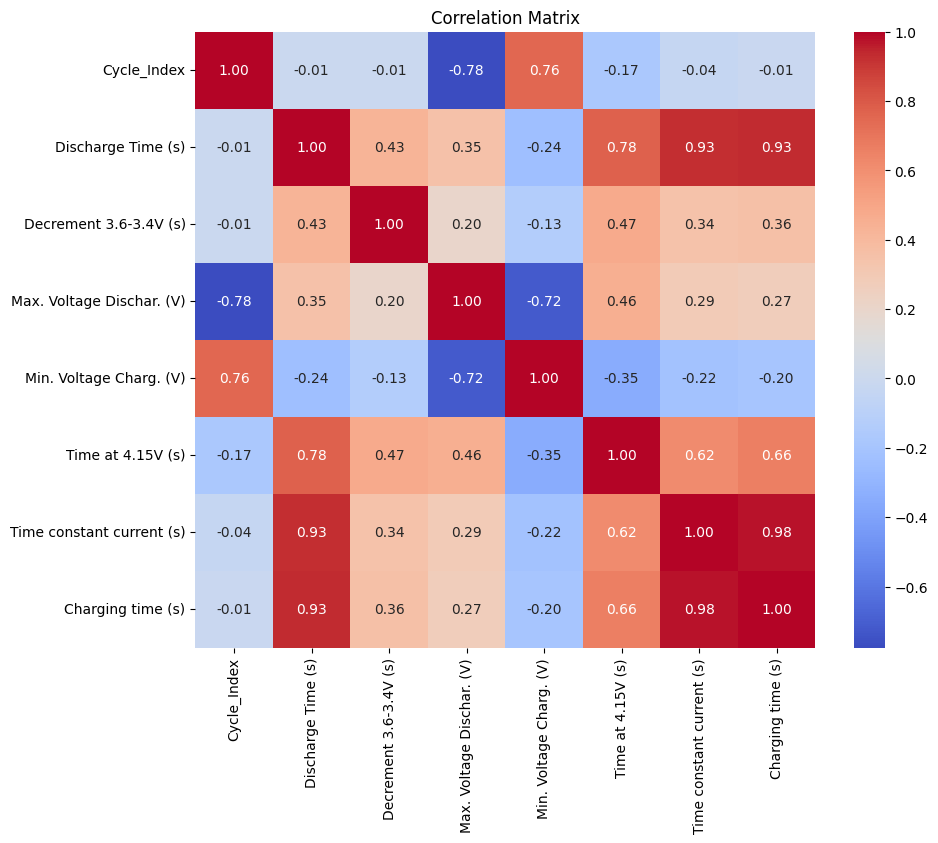

Cross-Validation R^2 Scores: [0.99933774 0.99713302 0.99823544 0.99939216 0.99892179]
Mean R^2: 1.00
Mean Absolute Error: 2.870229007633587
Root Mean Squared Error: 8.848309668400189
Mean Squared Error: 78.29
R^2 Score: 1.00


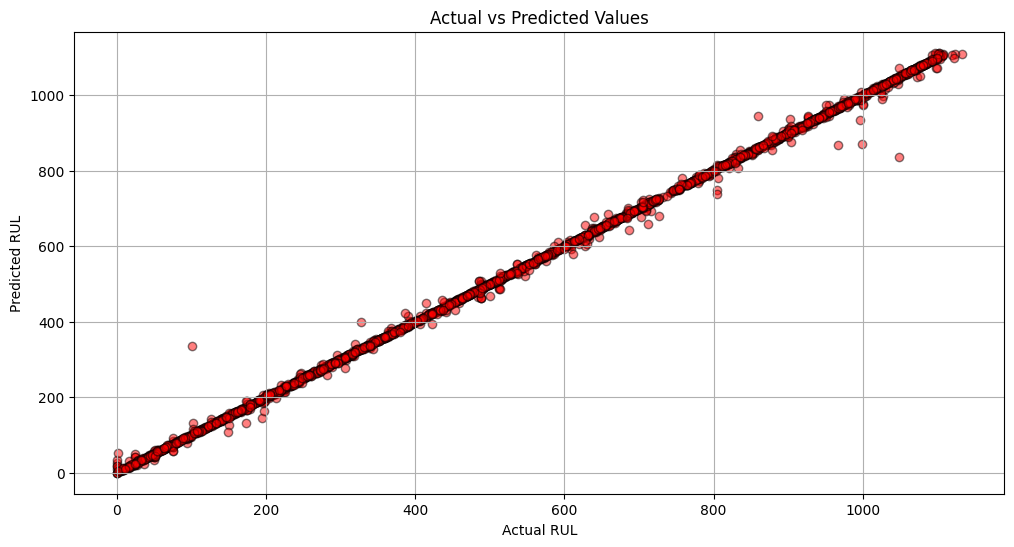

In [6]:
from sklearn.neighbors import KNeighborsRegressor  # Import KNeighborsRegressor

# Data preprocessing... (Preprocessing steps here):

# Split the data into features (X) and target variable (y)
y = data['RUL']
X = data.drop(['RUL'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=900)

# Dropping all the NaN values 
X_train = X_train[~y_train.isnull()]
y_train = y_train.dropna()
X_test = X_test[~y_test.isnull()]
y_test = y_test.dropna()
print("NAN values have been dropped successfully \n")

# Check if there are NaN values in the features
print("NaN values in y_train:", y_train.isnull().sum())
print("NaN values in y_test:", y_test.isnull().sum())
print("NaN values in X_train:", X_train.isnull().sum().sum())
print("NaN values in X_test:", X_test.isnull().sum().sum())

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize KNN Regressor and fit the model
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train_scaled, y_train)

# Draw a correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_train_scaled, columns=X.columns).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Apply cross-validation
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=42)
cv_scores = cross_val_score(knn_regressor, X_train_scaled, y_train, cv=cv, scoring='r2')  # Use 'r2' for regression

# Print cross-validation scores
print("Cross-Validation R^2 Scores:", cv_scores)
print("Mean R^2: {:.2f}".format(cv_scores.mean()))

# Make predictions
y_pred = knn_regressor.predict(X_test_scaled)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Scatter plot for actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5, c="red", edgecolors='k')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.grid(True)
plt.show()


# KNN Classification:
K-Nearest Neighbors (KNN) Classifier is a simple and intuitive machine learning algorithm used for classification tasks. It belongs to the family of lazy or instance-based learning algorithms.

NaN values in y_train: 11
NaN values in y_test: 3
NaN values in X_train: 0
NaN values in X_test: 0
NAN values has been dropped successfully 

NaN values in y_train: 0
NaN values in y_test: 0
NaN values in X_train: 0
NaN values in X_test: 0


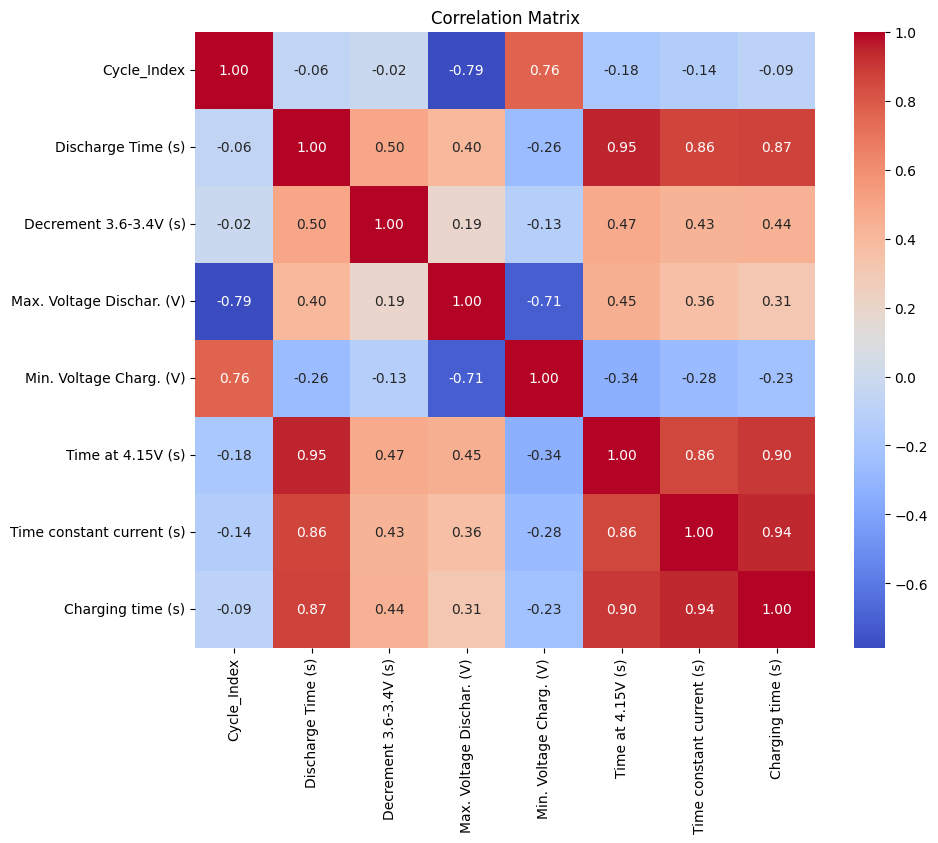

Cross-Validation Scores: [0.96760797 0.97591362 0.97508306 0.9717608  0.97342193]
Mean Accuracy: 97.28%
Accuracy: 97.51%
Classification Report:
              precision    recall  f1-score   support

       0-100       1.00      1.00      1.00       294
     100-200       1.00      0.98      0.99       269
   1000-1100       0.98      0.97      0.97       275
    1100-inf       0.88      0.88      0.88        16
     200-300       0.97      0.99      0.98       286
     300-400       0.98      0.98      0.98       307
     400-500       0.98      0.98      0.98       256
     500-600       0.96      0.98      0.97       243
     600-700       0.96      0.97      0.96       265
     700-800       0.96      0.94      0.95       219
     800-900       0.97      0.97      0.97       298
    900-1000       0.97      0.97      0.97       282

    accuracy                           0.98      3010
   macro avg       0.97      0.97      0.97      3010
weighted avg       0.98      0.98      0.98 

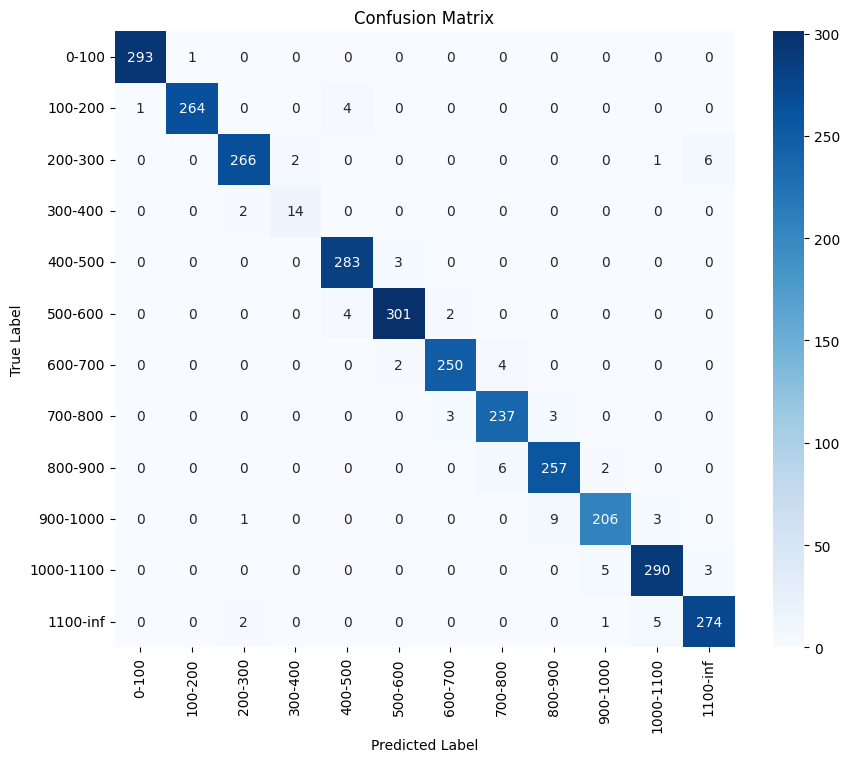

In [7]:
from sklearn.neighbors import KNeighborsClassifier  # Import KNeighborsClassifier

# Data preprocessing... (Preprocessing steps here):

# Define bins for classification
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, float('inf')]
# Create labels for each bin
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '1000-1100', '1100-inf']

# Add a new column 'RUL_bin' with the bin labels
data['RUL_bin'] = pd.cut(data['RUL'], bins=bins, labels=labels)

# Split the data into features (X) and target variable (y)
y = data['RUL_bin']
X = data.drop(['RUL', 'RUL_bin'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=900)

# Check for NaN values in the data
print("NaN values in y_train:", y_train.isnull().sum())
print("NaN values in y_test:", y_test.isnull().sum())
print("NaN values in X_train:", X_train.isnull().sum().sum())
print("NaN values in X_test:", X_test.isnull().sum().sum())

# Drop NaN values in the data
X_train = X_train[~y_train.isnull()]
y_train = y_train.dropna()
X_test = X_test[~y_test.isnull()]
y_test = y_test.dropna()
print ("NAN values has been dropped successfully \n")

# Check if there are other NaN values in the data
print("NaN values in y_train:", y_train.isnull().sum())
print("NaN values in y_test:", y_test.isnull().sum())
print("NaN values in X_train:", X_train.isnull().sum().sum())
print("NaN values in X_test:", X_test.isnull().sum().sum())

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize KNN Classifier and fit the model
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_scaled, y_train)

# draw a correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_train_scaled, columns=X.columns).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Apply cross-validation 
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=42)
cv_scores = cross_val_score(knn_classifier, X_train_scaled, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.2%}".format(cv_scores.mean()))

# Make predictions
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Linear Regression:
Linear Regression is a fundamental statistical and machine learning technique used for predicting a continuous target variable based on one or more predictor variables. 

NAN values have been dropped successfully 

NaN values in y_train: 0
NaN values in y_test: 0
NaN values in X_train: 0
NaN values in X_test: 0


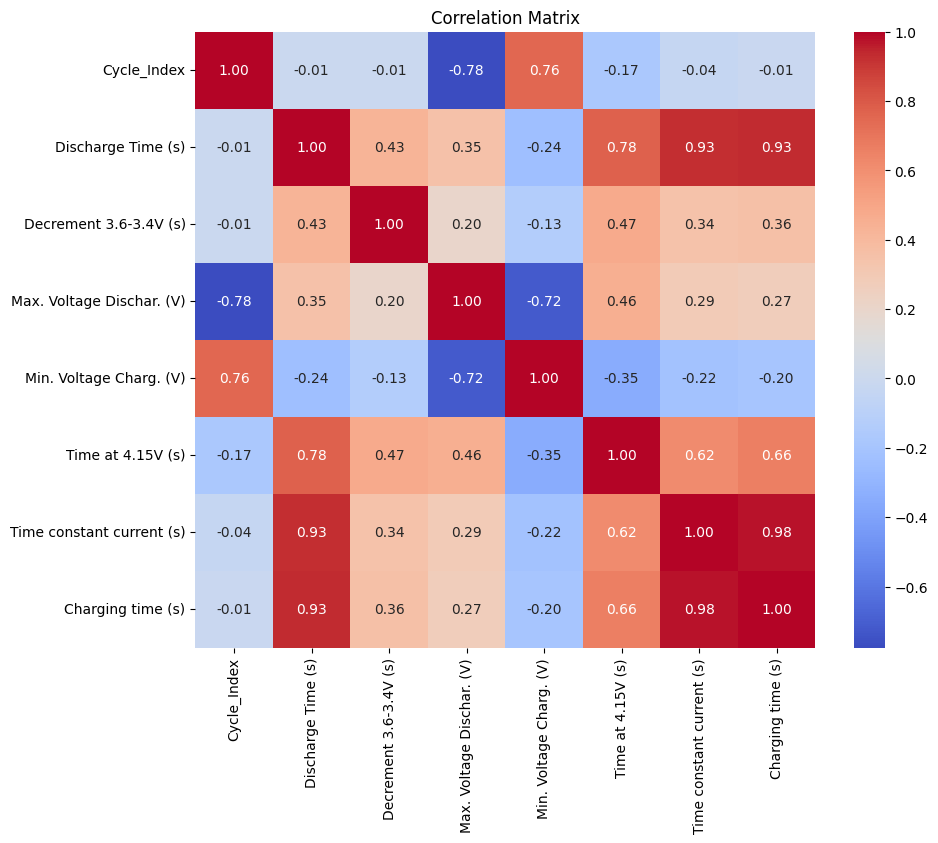

Cross-Validation R^2 Scores: [0.99949358 0.99939785 0.99946899 0.99957554 0.99953931]
Mean R^2: 1.00
Mean Absolute Error: 4.415000255561129
Root Mean Squared Error: 6.9648977077278404
Mean Squared Error: 48.51
R^2 Score: 1.00


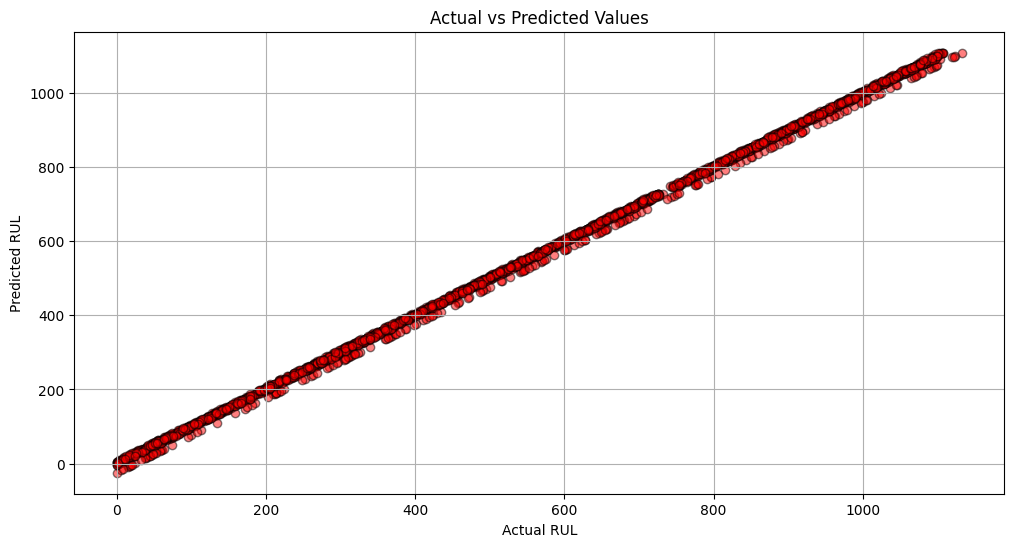

In [11]:
from sklearn.linear_model import LinearRegression  # Import LinearRegression

# Data preprocessing... (Preprocessing steps here):

# Split the data into features (X) and target variable (y)
y = data['RUL']
X = data.drop(['RUL'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=900)

# Dropping all the NaN values 
X_train = X_train[~y_train.isnull()]
y_train = y_train.dropna()
X_test = X_test[~y_test.isnull()]
y_test = y_test.dropna()
print("NAN values have been dropped successfully \n")

# Check if there are NaN values in the features
print("NaN values in y_train:", y_train.isnull().sum())
print("NaN values in y_test:", y_test.isnull().sum())
print("NaN values in X_train:", X_train.isnull().sum().sum())
print("NaN values in X_test:", X_test.isnull().sum().sum())

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Linear Regression and fit the model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train)

# draw a correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_train_scaled, columns=X.columns).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Apply cross-validation
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=42)
cv_scores = cross_val_score(linear_regressor, X_train_scaled, y_train, cv=cv, scoring='r2')

# Print cross-validation scores
print("Cross-Validation R^2 Scores:", cv_scores)
print("Mean R^2: {:.2f}".format(cv_scores.mean()))

# Make predictions
y_pred = linear_regressor.predict(X_test_scaled)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Scatter plot for actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5, c="red", edgecolors='k')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.grid(True)
plt.show()


# Logistic Regression:
Logistic Regression is a statistical and machine learning model used for binary and multi-class classification tasks. Despite its name, it is primarily employed for classification rather than regression.

NaN values in y_train: 11
NaN values in y_test: 3
NaN values in X_train: 0
NaN values in X_test: 0
NAN values have been dropped successfully 

NaN values in y_train: 0
NaN values in y_test: 0
NaN values in X_train: 0
NaN values in X_test: 0


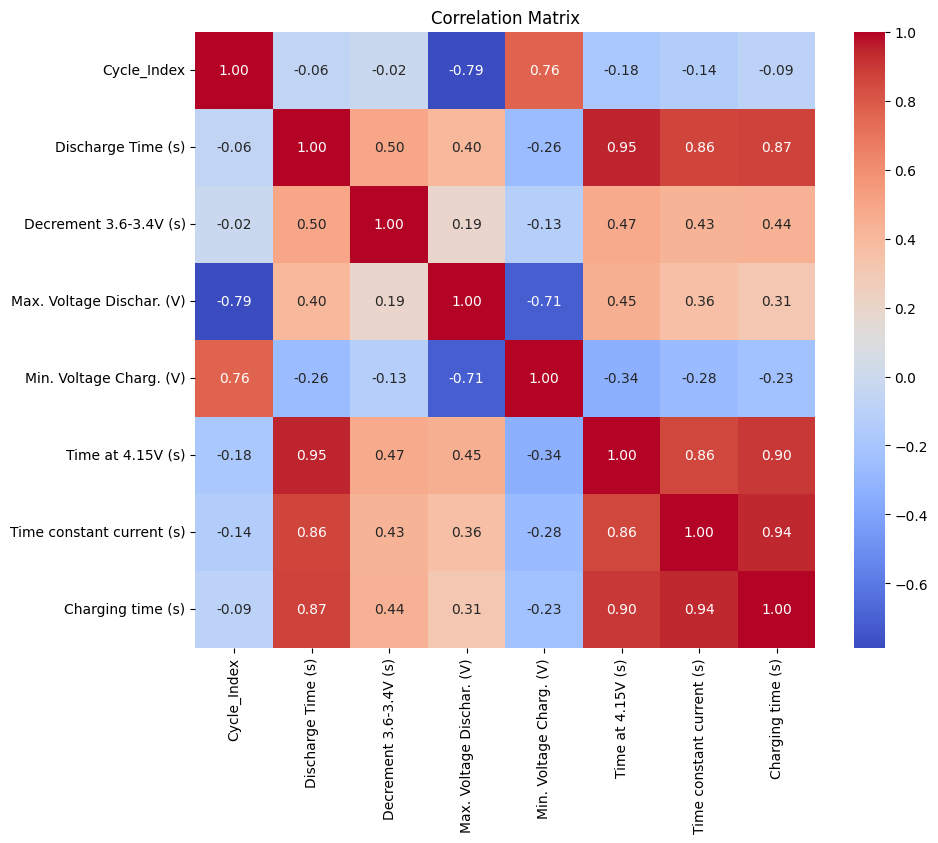

Cross-Validation Scores: [0.89784053 0.90614618 0.90614618 0.91694352 0.90282392]
Mean Accuracy: 90.60%
Accuracy: 91.13%
Classification Report:
              precision    recall  f1-score   support

       0-100       0.98      0.98      0.98       294
     100-200       0.93      0.97      0.95       269
   1000-1100       0.95      0.97      0.96       275
    1100-inf       0.92      0.75      0.83        16
     200-300       0.92      0.93      0.92       286
     300-400       0.94      0.87      0.90       307
     400-500       0.87      0.89      0.88       256
     500-600       0.87      0.91      0.89       243
     600-700       0.88      0.93      0.90       265
     700-800       0.97      0.76      0.85       219
     800-900       0.87      0.89      0.88       298
    900-1000       0.87      0.92      0.89       282

    accuracy                           0.91      3010
   macro avg       0.91      0.90      0.90      3010
weighted avg       0.91      0.91      0.91 

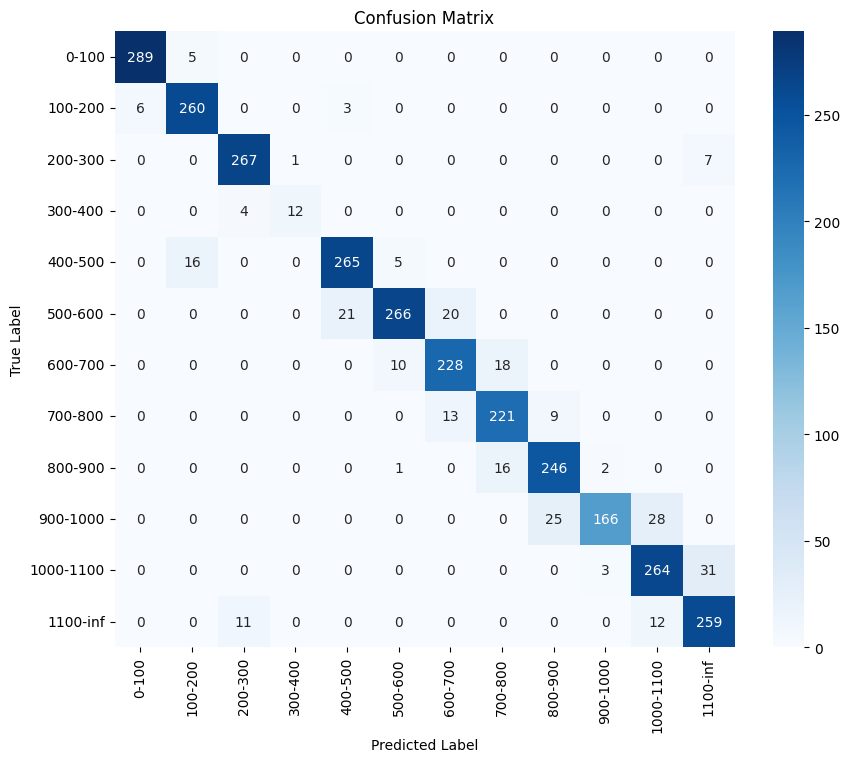

In [12]:
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression

# Data preprocessing... (Preprocessing steps here):

# Define bins for classification
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, float('inf')]
# Create labels for each bin
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '1000-1100', '1100-inf']

# Add a new column 'RUL_bin' with the bin labels
data['RUL_bin'] = pd.cut(data['RUL'], bins=bins, labels=labels)

# Split the data into features (X) and target variable (y)
y = data['RUL_bin']
X = data.drop(['RUL', 'RUL_bin'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=900)

# Check for NaN values in the data
print("NaN values in y_train:", y_train.isnull().sum())
print("NaN values in y_test:", y_test.isnull().sum())
print("NaN values in X_train:", X_train.isnull().sum().sum())
print("NaN values in X_test:", X_test.isnull().sum().sum())

# Drop NaN values in the data
X_train = X_train[~y_train.isnull()]
y_train = y_train.dropna()
X_test = X_test[~y_test.isnull()]
y_test = y_test.dropna()
print("NAN values have been dropped successfully \n")

# Check if there are NaN values in the features
print("NaN values in y_train:", y_train.isnull().sum())
print("NaN values in y_test:", y_test.isnull().sum())
print("NaN values in X_train:", X_train.isnull().sum().sum())
print("NaN values in X_test:", X_test.isnull().sum().sum())

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression and fit the model
logistic_regressor = LogisticRegression(max_iter=1000, random_state=42)
logistic_regressor.fit(X_train_scaled, y_train)

# Draw a correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_train_scaled, columns=X.columns).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Apply cross-validation
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=42)
cv_scores = cross_val_score(logistic_regressor, X_train_scaled, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.2%}".format(cv_scores.mean()))

# Make predictions
y_pred = logistic_regressor.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Decision Tree Regression:
Decision Tree Regression is a machine learning algorithm used for predicting continuous numerical values. Unlike its classification counterpart, decision trees for regression tasks aim to predict a real-valued output rather than a categorical one. 

NAN values have been dropped successfully 

NaN values in y_train: 0
NaN values in y_test: 0
NaN values in X_train: 0
NaN values in X_test: 0


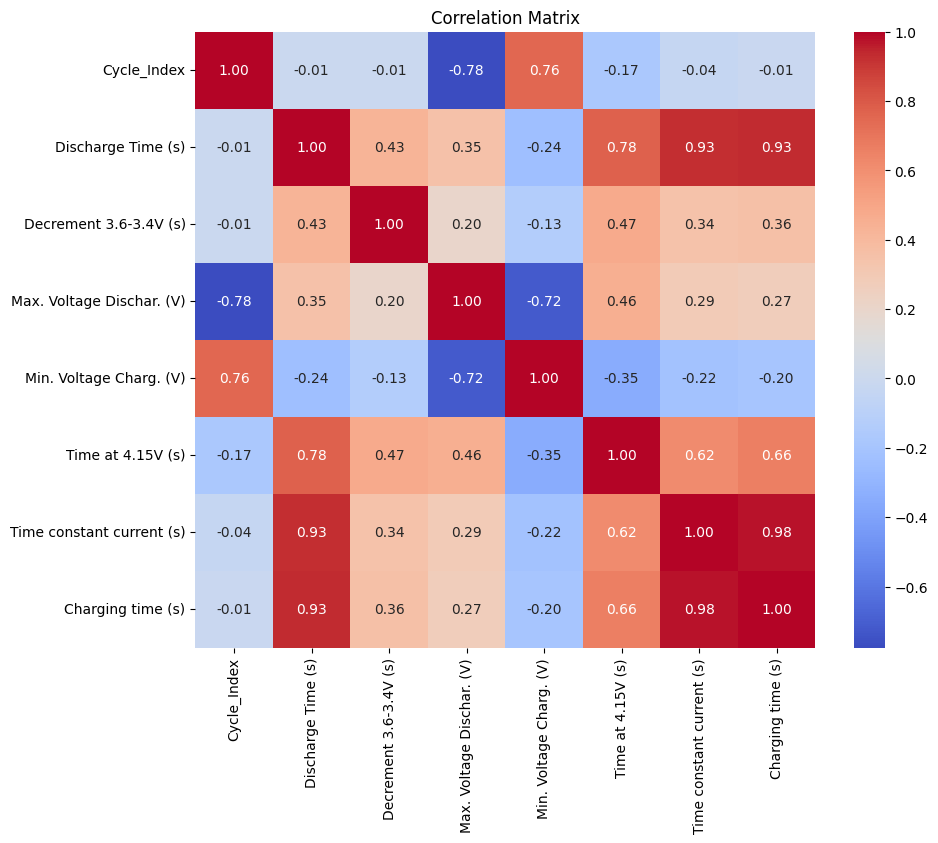

KeyboardInterrupt: 

In [15]:
from sklearn.tree import DecisionTreeRegressor, plot_tree  # Import DecisionTreeRegressor and plot_tree

# Data preprocessing... (Preprocessing steps here):

# Split the data into features (X) and target variable (y)
y = data['RUL']
X = data.drop(['RUL'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=900)

# Dropping all the NaN values 
X_train = X_train[~y_train.isnull()]
y_train = y_train.dropna()
X_test = X_test[~y_test.isnull()]
y_test = y_test.dropna()
print("NAN values have been dropped successfully \n")

# Check if there are NaN values in the features
print("NaN values in y_train:", y_train.isnull().sum())
print("NaN values in y_test:", y_test.isnull().sum())
print("NaN values in X_train:", X_train.isnull().sum().sum())
print("NaN values in X_test:", X_test.isnull().sum().sum())

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Draw a correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_train_scaled, columns=X.columns).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Initialize Decision Tree Regressor and fit the model
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
decision_tree_regressor.fit(X_train_scaled, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_regressor, filled=True, feature_names=X.columns, rounded=True, fontsize=8)
plt.show()

# Apply cross-validation
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=42)
cv_scores = cross_val_score(decision_tree_regressor, X_train_scaled, y_train, cv=cv, scoring='r2')

# Print cross-validation scores
print("Cross-Validation R^2 Scores:", cv_scores)
print("Mean R^2: {:.2f}".format(cv_scores.mean()))

# Make predictions
y_pred = decision_tree_regressor.predict(X_test_scaled)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Scatter plot for actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5, c="red", edgecolors='k')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.grid(True)
plt.show()


# Decision Tree Classification:
Decision Tree Classification is a machine learning algorithm used for predicting categorical outcomes or class labels. It is widely employed in various domains for its simplicity and interpretability.

NaN values in y_train: 11
NaN values in y_test: 3
NaN values in X_train: 0
NaN values in X_test: 0
NaN values have been dropped successfully 

NaN values in y_train: 0
NaN values in y_test: 0
NaN values in X_train: 0
NaN values in X_test: 0


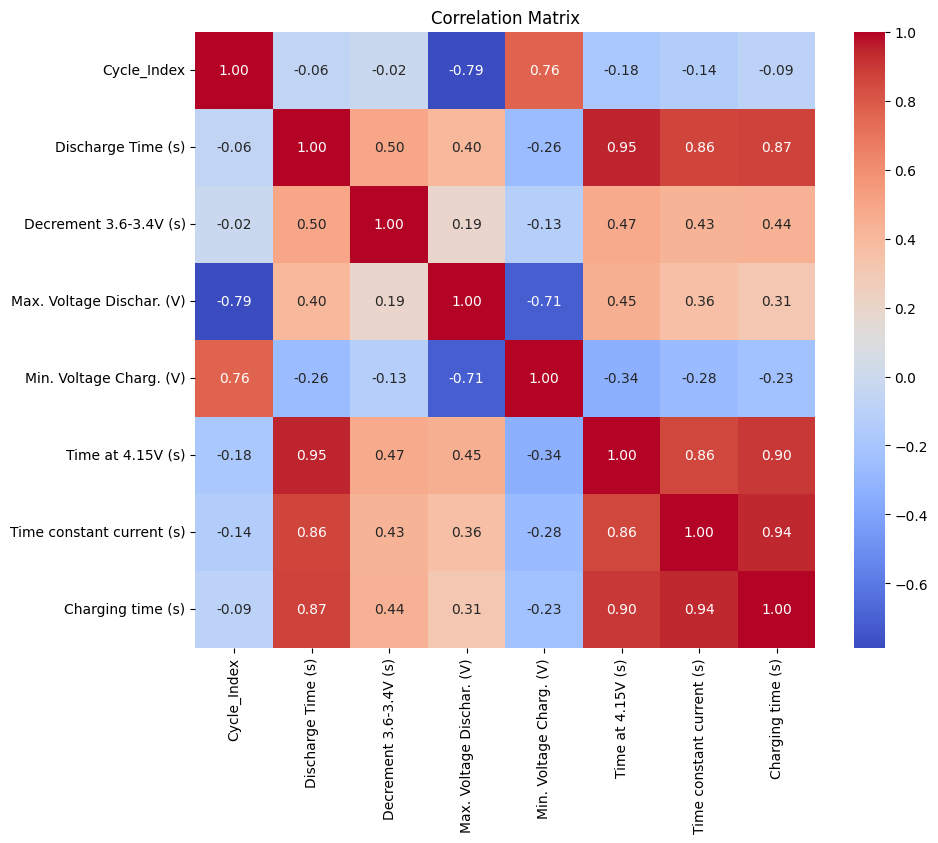

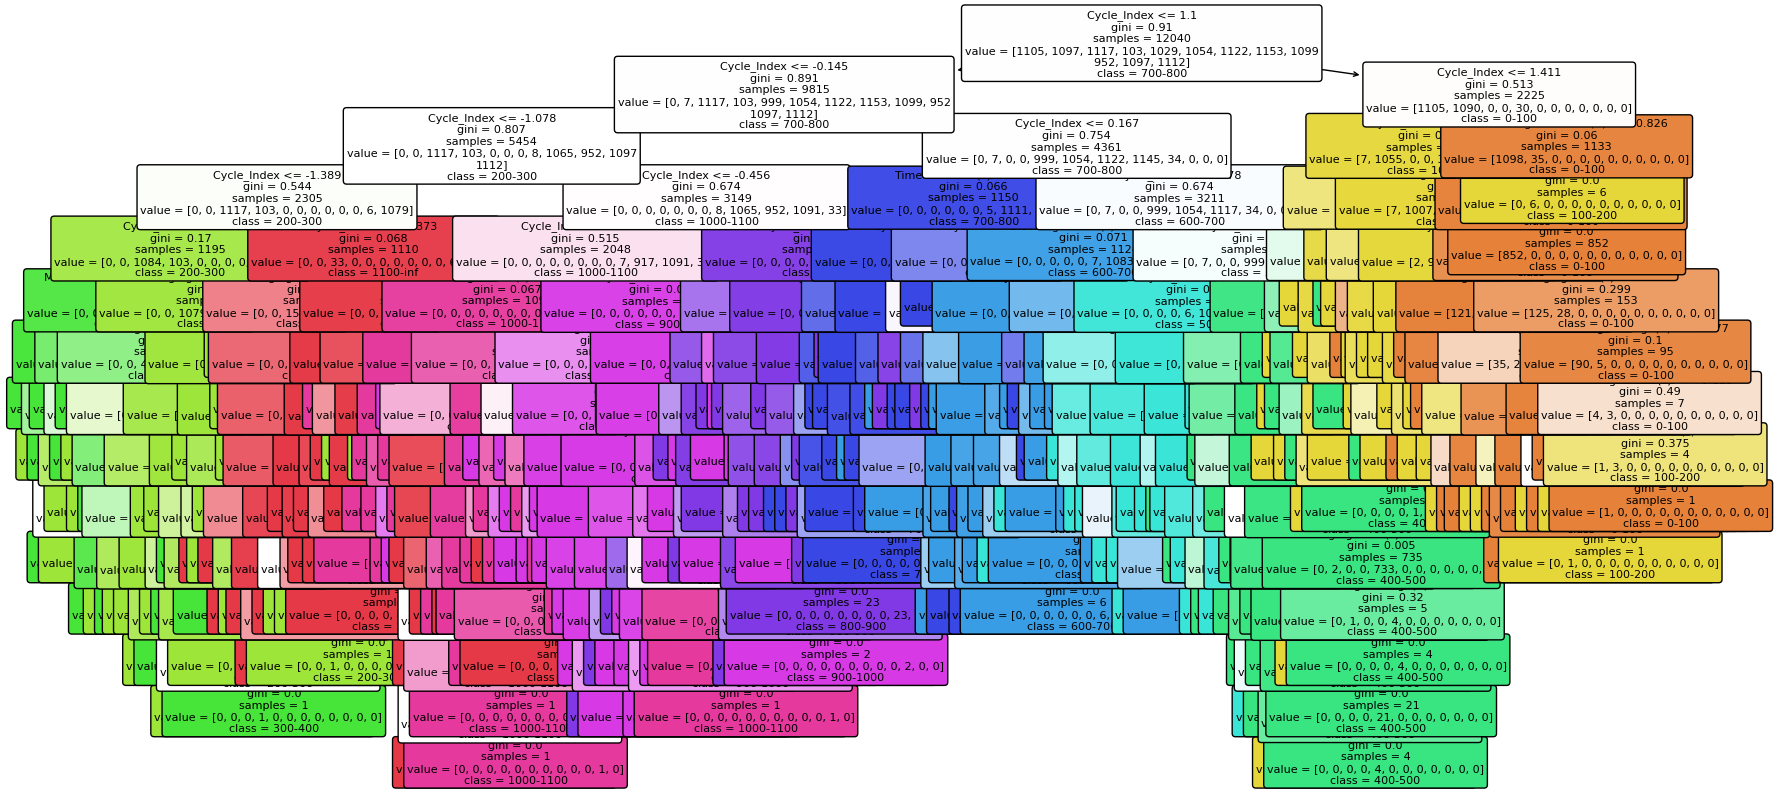

Cross-Validation Scores: [0.98255814 0.98671096 0.98255814 0.97757475 0.9858804 ]
Mean Accuracy: 98.31%
Accuracy: 98.04%
Classification Report:
              precision    recall  f1-score   support

       0-100       0.99      1.00      0.99       294
     100-200       0.99      0.99      0.99       269
   1000-1100       0.96      0.99      0.97       275
    1100-inf       0.73      0.69      0.71        16
     200-300       0.99      0.99      0.99       286
     300-400       0.99      0.99      0.99       307
     400-500       0.99      0.98      0.98       256
     500-600       0.95      0.99      0.97       243
     600-700       1.00      0.97      0.98       265
     700-800       1.00      0.96      0.98       219
     800-900       0.95      0.98      0.97       298
    900-1000       0.99      0.96      0.97       282

    accuracy                           0.98      3010
   macro avg       0.96      0.96      0.96      3010
weighted avg       0.98      0.98      0.98 

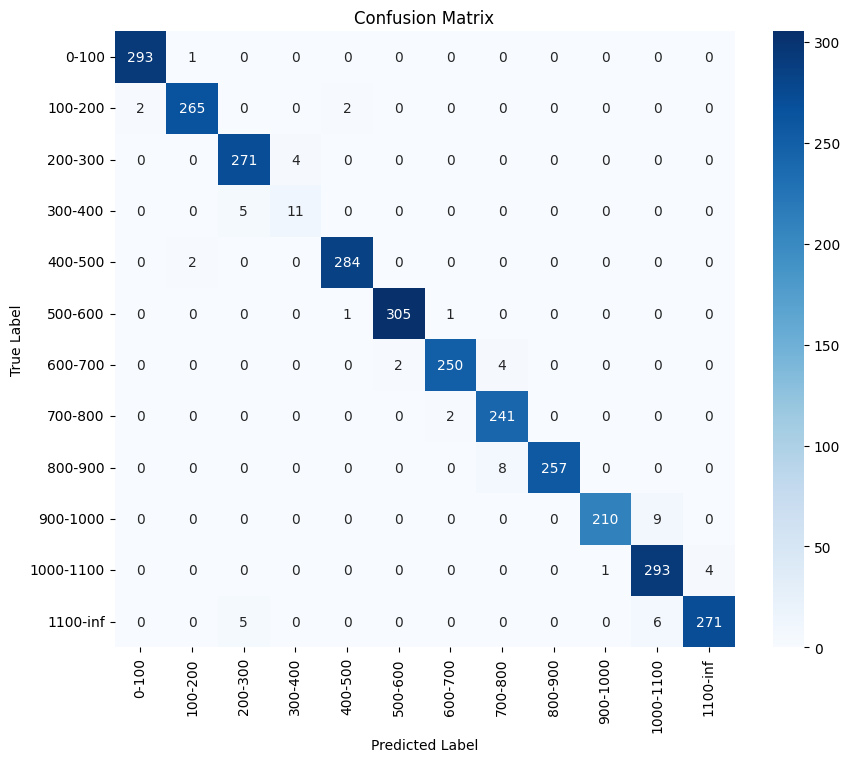

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Import DecisionTreeClassifier and plot_tree

# Data preprocessing... (Preprocessing steps here):

# Define bins for classification
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, float('inf')]
# Create labels for each bin
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '1000-1100', '1100-inf']

# Add a new column 'RUL_bin' with the bin labels
data['RUL_bin'] = pd.cut(data['RUL'], bins=bins, labels=labels)

# Split the data into features (X) and target variable (y)
y = data['RUL_bin']
X = data.drop(['RUL', 'RUL_bin'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=900)

# Check for NaN values in the data
print("NaN values in y_train:", y_train.isnull().sum())
print("NaN values in y_test:", y_test.isnull().sum())
print("NaN values in X_train:", X_train.isnull().sum().sum())
print("NaN values in X_test:", X_test.isnull().sum().sum())

# Drop NaN values in the target variable
X_train = X_train[~y_train.isnull()]
y_train = y_train.dropna()
X_test = X_test[~y_test.isnull()]
y_test = y_test.dropna()
print("NaN values have been dropped successfully \n")

# Check if there are NaN values in the features
print("NaN values in y_train:", y_train.isnull().sum())
print("NaN values in y_test:", y_test.isnull().sum())
print("NaN values in X_train:", X_train.isnull().sum().sum())
print("NaN values in X_test:", X_test.isnull().sum().sum())

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# draw a correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_train_scaled, columns=X.columns).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Initialize Decision Tree Classifier and fit the model
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train_scaled, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_classifier, filled=True, feature_names=X.columns, class_names=labels, rounded=True, fontsize=8)
plt.show()

# Apply cross-validation
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=42)
cv_scores = cross_val_score(decision_tree_classifier, X_train_scaled, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.2%}".format(cv_scores.mean()))

# Make predictions
y_pred = decision_tree_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Support Vector Regression:
Support Vector Regression is a supervised machine learning algorithm used for regression tasks. It belongs to the family of Support Vector Machines (SVM) and is particularly effective in capturing complex relationships in data.

In [ ]:
from sklearn.svm import SVR  # Import SVR

# Data preprocessing... (Preprocessing steps here):

# Split the data into features (X) and target variable (y)
y = data['RUL']
X = data.drop(['RUL'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=900)

# Dropping all the NaN values 
X_train = X_train[~y_train.isnull()]
y_train = y_train.dropna()
X_test = X_test[~y_test.isnull()]
y_test = y_test.dropna()
print("NAN values have been dropped successfully \n")

# Check if there are NaN values in the features
print("NaN values in y_train:", y_train.isnull().sum())
print("NaN values in y_test:", y_test.isnull().sum())
print("NaN values in X_train:", X_train.isnull().sum().sum())
print("NaN values in X_test:", X_test.isnull().sum().sum())

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Draw a correlation matrix before fitting the SVR
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_train_scaled, columns=X.columns).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Initialize Support Vector Regressor (SVR) and fit the model
svr_regressor = SVR()
svr_regressor.fit(X_train_scaled, y_train)

# Apply cross-validation
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=42)
cv_scores = cross_val_score(svr_regressor, X_train_scaled, y_train, cv=cv, scoring='r2')  # Use 'r2' for regression

# Print cross-validation scores
print("Cross-Validation R^2 Scores:", cv_scores)
print("Mean R^2: {:.2f}".format(cv_scores.mean()))

# Make predictions
y_pred = svr_regressor.predict(X_test_scaled)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Scatter plot for actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5, c="red", edgecolors='k')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.grid(True)
plt.show()


# Support Vector Classification:
Support Vector Classification, commonly known as Support Vector Machine (SVM), is a powerful machine learning algorithm used for classification tasks.

In [ ]:
from sklearn.svm import SVC  # Import SVC for classification

# Data preprocessing... (Preprocessing steps here):

# Define bins for classification
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, float('inf')]
# Create labels for each bin
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '1000-1100', '1100-inf']

# Add a new column 'RUL_bin' with the bin labels
data['RUL_bin'] = pd.cut(data['RUL'], bins=bins, labels=labels)

# Split the data into features (X) and target variable (y)
y = data['RUL_bin']
X = data.drop(['RUL', 'RUL_bin'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=900)

# Check for NaN values in the target variable (y_train and y_test)
print("NaN values in y_train:", y_train.isnull().sum())
print("NaN values in y_test:", y_test.isnull().sum())
print("NaN values in X_train:", X_train.isnull().sum().sum())
print("NaN values in X_test:", X_test.isnull().sum().sum())

# Drop NaN values in the target variable
X_train = X_train[~y_train.isnull()]
y_train = y_train.dropna()
X_test = X_test[~y_test.isnull()]
y_test = y_test.dropna()
print("NAN values have been dropped successfully \n")

# Check if there are NaN values in the features
print("NaN values in y_train:", y_train.isnull().sum())
print("NaN values in y_test:", y_test.isnull().sum())
print("NaN values in X_train:", X_train.isnull().sum().sum())
print("NaN values in X_test:", X_test.isnull().sum().sum())

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Support Vector Classifier (SVC) and fit the model
svc_classifier = SVC()
svc_classifier.fit(X_train_scaled, y_train)

# draw a correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_train_scaled, columns=X.columns).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Apply cross-validation
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=42)
cv_scores = cross_val_score(svc_classifier, X_train_scaled, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.2%}".format(cv_scores.mean()))

# Make predictions
y_pred = svc_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Random Forest Regression:
Random Forest Regression is an ensemble learning algorithm used for making predictions in regression tasks. It builds multiple decision trees and combines their outputs to provide a more accurate and robust prediction.

In [ ]:
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor

# Data preprocessing... (Preprocessing steps here):

# Split the data into features (X) and target variable (y)
y = data['RUL']
X = data.drop(['RUL'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=900)

# Dropping all the NaN values 
X_train = X_train[~y_train.isnull()]
y_train = y_train.dropna()
X_test = X_test[~y_test.isnull()]
y_test = y_test.dropna()
print("NAN values have been dropped successfully \n")

# Check if there are NaN values in the features
print("NaN values in y_train:", y_train.isnull().sum())
print("NaN values in y_test:", y_test.isnull().sum())
print("NaN values in X_train:", X_train.isnull().sum().sum())
print("NaN values in X_test:", X_test.isnull().sum().sum())

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Draw a correlation matrix before fitting the Random Forest Regressor
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_train_scaled, columns=X.columns).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Initialize Random Forest Regressor and fit the model
random_forest_regressor = RandomForestRegressor(random_state=42)
random_forest_regressor.fit(X_train_scaled, y_train)

# Apply cross-validation
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=42)
cv_scores = cross_val_score(random_forest_regressor, X_train_scaled, y_train, cv=cv, scoring='r2')

# Print cross-validation scores
print("Cross-Validation R^2 Scores:", cv_scores)
print("Mean R^2: {:.2f}".format(cv_scores.mean()))

# Make predictions
y_pred = random_forest_regressor.predict(X_test_scaled)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Scatter plot for actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5, c="red", edgecolors='k')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.grid(True)
plt.show()


# Random Forest Classification:
Random Forest Classification is a go-to choice for many practitioners due to its ability to improve accuracy and handle complex datasets. It is particularly useful when interpretability of individual trees is not a primary concern, and the focus is on achieving robust and accurate predictions.

In [ ]:
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier

# Data preprocessing... (Preprocessing steps here):

# Define bins for classification
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, float('inf')]
# Create labels for each bin
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '1000-1100', '1100-inf']

# Add a new column 'RUL_bin' with the bin labels
data['RUL_bin'] = pd.cut(data['RUL'], bins=bins, labels=labels)

# Split the data into features (X) and target variable (y)
y = data['RUL_bin']
X = data.drop(['RUL', 'RUL_bin'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=900)

# Check for NaN values in the target variable (y_train and y_test)
print("NaN values in y_train:", y_train.isnull().sum())
print("NaN values in y_test:", y_test.isnull().sum())
print("NaN values in X_train:", X_train.isnull().sum().sum())
print("NaN values in X_test:", X_test.isnull().sum().sum())

# Drop NaN values in the target variable
X_train = X_train[~y_train.isnull()]
y_train = y_train.dropna()
X_test = X_test[~y_test.isnull()]
y_test = y_test.dropna()
print("NaN values have been dropped successfully \n")

# Check if there are NaN values in the features
print("NaN values in y_train:", y_train.isnull().sum())
print("NaN values in y_test:", y_test.isnull().sum())
print("NaN values in X_train:", X_train.isnull().sum().sum())
print("NaN values in X_test:", X_test.isnull().sum().sum())

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Random Forest Classifier and fit the model
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train_scaled, y_train)

# draw a correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_train_scaled, columns=X.columns).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Apply cross-validation
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=42)
cv_scores = cross_val_score(random_forest_classifier, X_train_scaled, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy: {:.2%}".format(cv_scores.mean()))

# Make predictions
y_pred = random_forest_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
